In [42]:
# Importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

In [43]:
# Carregando a base de dados

path = kagglehub.dataset_download("somesh24/spambase")
os.environ['KAGLE_CONFIG_DIR'] = '/content'
print("Path to dataset files:", path)
os.listdir(path)

100%|██████████| 127k/127k [00:00<00:00, 373kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/somesh24/spambase/versions/1


['spambase_csv.csv']

In [44]:
path = '/root/.cache/kagglehub/datasets/somesh24/spambase/versions/1'
df = pd.read_csv(path + '/spambase_csv.csv')

## Propriedades dos dados:

In [45]:
# Verificando as linhas iniciais do dataset
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [46]:
# Verificando todas as colunas com os tipos de dados e a quantidade de conteúdos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

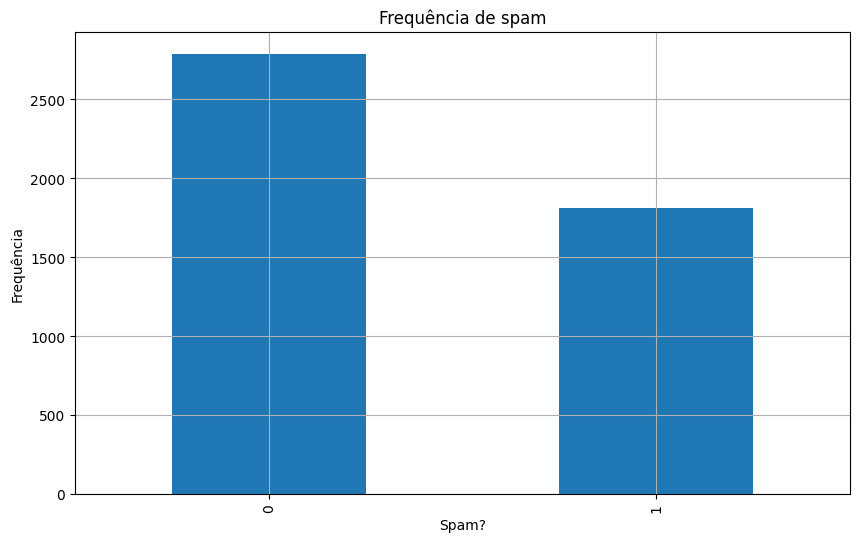

In [47]:
# Vamos verificar a frequência que caímos na categoria spam
# 1 é spam e 0 não
plt.figure(figsize=(10,6))
plt.title("Frequência de spam")
df['class'].value_counts().plot(kind='bar')
plt.xlabel("Spam?")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

In [48]:
qtd_spam = df['class'].value_counts().reset_index(name='Frequência')
qtd_spam.columns = ['class', 'Frequência']
qtd_spam

,class,Frequência
0,0,2788
1,1,1813


# ML:

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report

# Features
X = df.drop('class', axis=1)
# Target variable
y = df['class']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar:

In [62]:
scaler_standard = StandardScaler()
X_train_scaled = scaler_standard.fit_transform(X_train)
X_test_scaled = scaler_standard.transform(X_test)

# Treinar o modelo com os dados padronizados
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred_standard = model.predict(X_test_scaled)

print("Desempenho com Padronização (StandardScaler):")
print(classification_report(y_test, y_pred_standard))

Desempenho com Padronização (StandardScaler):
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921



**Regressão Logistica**

In [63]:
from sklearn.linear_model import LogisticRegression

#Criando e treinando o modelo
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

# Faça previsões
y_pred = model.predict(X_test)

# Avalie o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 0.9229098805646037


# Normalizar:

In [65]:
scaler_minmax = MinMaxScaler()
X_train_normalized = scaler_minmax.fit_transform(X_train)
X_test_normalized = scaler_minmax.transform(X_test)

# Treinar o modelo com os dados normalizados
model.fit(X_train_normalized, y_train)
y_pred_normalized = model.predict(X_test_normalized)

print("Desempenho com Normalização (MinMaxScaler):")
print(classification_report(y_test, y_pred_normalized))

Desempenho com Normalização (MinMaxScaler):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       531
           1       0.94      0.82      0.87       390

    accuracy                           0.90       921
   macro avg       0.91      0.89      0.89       921
weighted avg       0.90      0.90      0.90       921



**Árvore de decisão**

In [66]:
from sklearn.tree import DecisionTreeClassifier

#Criando e treinando o modelo
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Faça previsões
y_pred = model.predict(X_test)

# Avalie o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 0.9077090119435396


**Random Forest**


In [67]:
from sklearn.ensemble import RandomForestClassifier

#Criando e treinando o modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Faça previsões
y_pred = model.predict(X_test)

# Avalie o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 0.9576547231270358
